### `Importing Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### `Data Import`

In [2]:
raw_data = pd.read_csv("https://github.com/neustackapp/assignment/raw/refs/heads/main/employee_data.csv")
print(f"Shape of the dataset: {raw_data.shape}")
raw_data.head()

Shape of the dataset: (10000, 10)


,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


### `Statistical Summary`

In [4]:
raw_data.describe() ## Statistical info. about numerical columns..

,employee_id,age,salary,tenure_years,enrolled
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,15000.50000,43.0020,65032.967907,3.967720,0.617400
std,2886.89568,12.2858,14923.958446,3.895488,0.486046
min,10001.00000,22.0000,2207.790000,0.000000,0.000000
25%,12500.75000,33.0000,54714.342500,1.200000,0.000000
50%,15000.50000,43.0000,65056.050000,2.800000,1.000000
75%,17500.25000,54.0000,75053.687500,5.600000,1.000000
max,20000.00000,64.0000,120312.000000,36.000000,1.000000


### It is clear that `mean and median are close` to each other, which essentially signifies the `absence of potential outliers`. However, we'll be plotting it to see if this is actually True.

In [5]:
raw_data.describe(include="object") ## Statistical info. about Categorical columns..

,gender,marital_status,employment_type,region,has_dependents
count,10000,10000,10000,10000,10000
unique,3,4,3,4,2
top,Male,Married,Full-time,West,Yes
freq,4815,4589,7041,2582,5993


### `Sanity Check`

In [6]:
# Concatenate the count of null values and the percentage of null values into a single DataFrame
nullsFrame = pd.concat([raw_data.isnull().sum(), round(raw_data.isnull().mean() * 100,2)],
                       axis=1,
                       keys=["Count", "Percentage"])

## print the nullsFrame
print(f"The Data Frame of Missing Values in the Data : \n {nullsFrame}")

The Data Frame of Missing Values in the Data : 
                  Count  Percentage
employee_id          0         0.0
age                  0         0.0
gender               0         0.0
marital_status       0         0.0
salary               0         0.0
employment_type      0         0.0
region               0         0.0
has_dependents       0         0.0
tenure_years         0         0.0
enrolled             0         0.0


In [7]:
raw_data=raw_data.drop_duplicates()

In [8]:
raw_data.duplicated().any()

np.False_

### Hence, the data is duplicates and NaN values free.

In [10]:
raw_data.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'salary',
       'employment_type', 'region', 'has_dependents', 'tenure_years',
       'enrolled'],
      dtype='object')

### `Categorical & numerical features`

In [20]:
categorical_data = raw_data.select_dtypes(include = "object")
categorical_data.head()

,gender,marital_status,employment_type,region,has_dependents
0,Female,Single,Part-time,West,No
1,Female,Single,Full-time,West,Yes
2,Male,Divorced,Part-time,Midwest,No
3,Female,Married,Full-time,Northeast,No
4,Male,Single,Contract,Midwest,Yes


In [21]:
numerical_data = raw_data.select_dtypes(exclude = "object")
numerical_data.head()

,employee_id,age,salary,tenure_years,enrolled
0,10001,60,55122.97,1.5,0
1,10002,50,89549.66,12.8,1
2,10003,36,74145.66,3.8,0
3,10004,64,53877.83,3.3,0
4,10005,29,63404.63,10.0,0


In [14]:
plt.rcParams["figure.figsize"] = (9,6)

### `Endogeneous variable study`

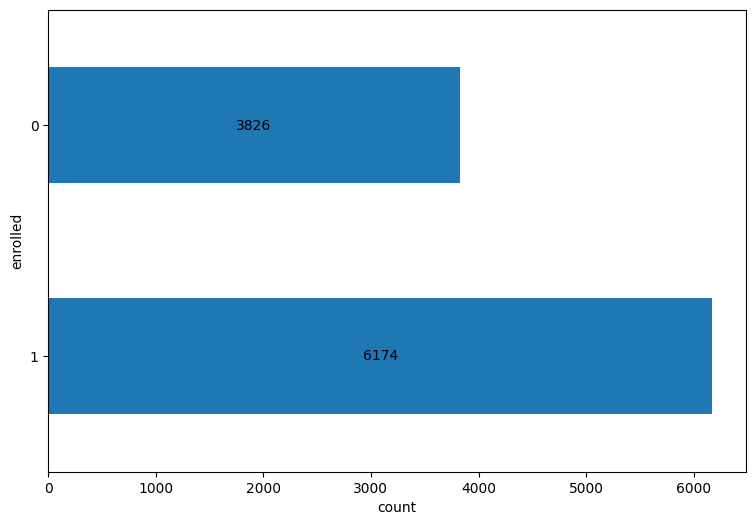

In [15]:
ax=raw_data["enrolled"].value_counts().plot.barh()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("count")
plt.show()

In [23]:
raw_data["enrolled"].value_counts(normalize=True)*100

enrolled
1    61.74
0    38.26
Name: proportion, dtype: float64

### The classes are `slightly imbalanced` in nature following 60-40 ratio. 